#  Load Karate Club

In [1]:
import networkx

In [9]:
from networkx import read_edgelist
from pandas import read_csv
from src.settings import RAW_DATA_DIR
from os.path import join as path_join
zkc = read_edgelist(
    path_join(RAW_DATA_DIR, 'karate.edgelist'),
    nodetype=int)
attributes = read_csv(
    path_join(RAW_DATA_DIR, 'karate.attributes.csv'),
    index_col=['node'])
attributes

,role,community
node,,
0,Administrator,Administrator
1,Member,Administrator
2,Member,Administrator
3,Member,Administrator
4,Member,Administrator
5,Member,Administrator
6,Member,Administrator
7,Member,Administrator
8,Member,Administrator


In [30]:
from src.features.deep_walk import DeepWalk
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

deep_walk = DeepWalk(zkc, 10, 80, 128, 10)
classifier = LogisticRegression(solver='liblinear')
classifier = LinearSVC()
model = make_pipeline(deep_walk, classifier)

X = [
    [node]
    for node in attributes.index]
y = attributes['community'] == 'Administrator'

nodes_train = [0, 33]
X_train = [
    [node]
    for node in nodes_train
]
y_train = y.loc[nodes_train]

nodes_test = [
    node
    for node in attributes.index
    if node not in nodes_train]
X_test = [
    [node]
    for node in nodes_test
]
y_test = y.loc[nodes_test]
print(y_train)

model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(y_test, preds))

node
0      True
33    False
Name: community, dtype: bool
              precision    recall  f1-score   support

       False       0.94      1.00      0.97        16
        True       1.00      0.94      0.97        16

   micro avg       0.97      0.97      0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



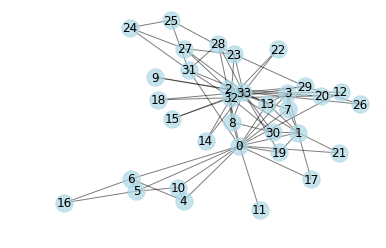

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
from networkx import (
    from_numpy_matrix, DiGraph,
    draw_networkx_nodes, draw_networkx_labels, 
    draw_networkx_edges,
    spring_layout)

pos = spring_layout(zkc)

draw_networkx_nodes(zkc, pos, node_color='lightblue')
draw_networkx_edges(zkc, pos, width=1.0, alpha=0.5)

labels = dict(zip(zkc.nodes(), zkc.nodes()))
draw_networkx_labels(zkc, pos, labels, font_size=12)
plt.axis('off')
plt.show()

In [ ]:
%matplotlib inline
# Plot administrator
plt.scatter(*embedding[0], c='C0', s=s)
plt.annotate('A', xy=embedding[0], ha='center', va='center')
x, y = zip(*[embedding[node] for node in administrator - set([0])])
plt.scatter(x, y, c='C0', s=s)

# Plot instructor
plt.scatter(*embedding[33], c='C1', s=s)
plt.annotate('I', xy=embedding[33], ha='center', va='center')
x, y = zip(*[embedding[node] for node in instructor- set([33])])
plt.scatter(x, y, c='C1', s=s)
plt.show()